In [80]:
#Basic Imports

In [81]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt


In [82]:
# Import Data

In [83]:
#df = pd.read_csv('exNB.csv')
df = pd.read_csv('exNB.csv',header=None)

In [84]:
# CoLab: Data prints head and tail and everything
#print(df.head)
df


,0,1,2
0,75.626754,181.704486,1.0
1,70.540408,176.177640,1.0
2,76.875023,178.667364,1.0
3,70.225610,157.504877,1.0
4,74.106298,168.525499,1.0
...,...,...,...
995,68.394140,141.464087,0.0
996,65.280727,138.177757,0.0
997,65.345827,135.199530,0.0
998,59.385331,152.598596,0.0


In [85]:
X = df.to_numpy()

In [86]:
X

array([[ 75.62675441, 181.70448626,   1.        ],
       [ 70.54040833, 176.17763989,   1.        ],
       [ 76.87502316, 178.66736388,   1.        ],
       ...,
       [ 65.34582701, 135.19952982,   0.        ],
       [ 59.38533074, 152.59859562,   0.        ],
       [ 68.708487  , 129.95783574,   0.        ]], shape=(1000, 3))

In [87]:
y = X[:,2]

In [88]:
X = X[:,:2]

In [89]:
X

array([[ 75.62675441, 181.70448626],
       [ 70.54040833, 176.17763989],
       [ 76.87502316, 178.66736388],
       ...,
       [ 65.34582701, 135.19952982],
       [ 59.38533074, 152.59859562],
       [ 68.708487  , 129.95783574]], shape=(1000, 2))

In [90]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [91]:
set(y)

{np.float64(0.0), np.float64(1.0)}

In [92]:

X.shape

(1000, 2)

In [93]:
y.shape

(1000,)

In [94]:
#Data Visualization

In [95]:
#Boolean Indexing


In [96]:
len(X[y==0,0])

500

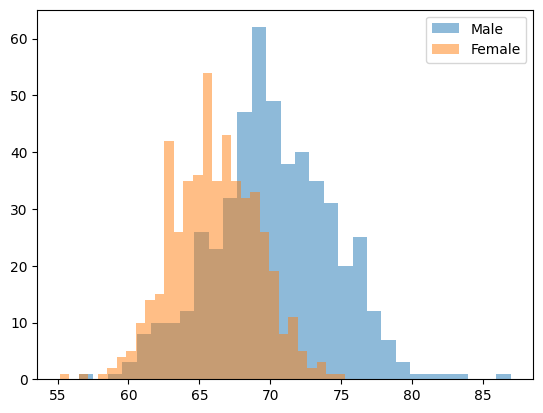

In [97]:
plt.figure()
plt.hist(X[y==1,0],label='Male',alpha =0.5,bins = 30)
plt.hist(X[y==0,0],label='Female',alpha =0.5,bins = 30)
plt.legend()

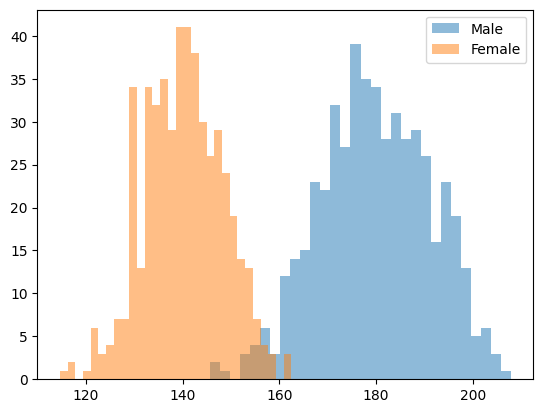

In [98]:
plt.figure()
plt.hist(X[y==1,1],label='Male',alpha =0.5,bins = 30)
plt.hist(X[y==0,1],label='Female',alpha =0.5,bins = 30)
plt.legend()

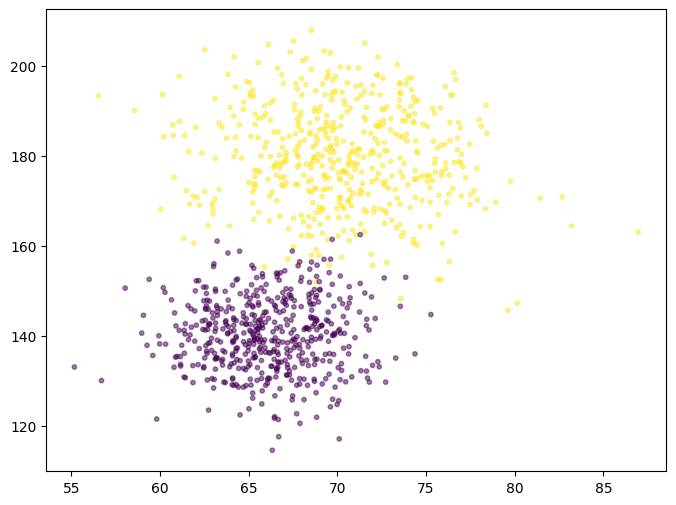

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.5,s=10)

In [100]:
#Naive Bayes

In [101]:
from scipy.stats import multivariate_normal as mvn

In [102]:
class NaiveGaussNB():
    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = sorted(set(y.astype(int)))
        self.class2index = {k: i for i, k in enumerate(self.K)}
        for k in self.K:
            X_k = X[y == k]
            self.likelihoods[k] = {
                "mean": X_k.mean(axis=0),
                "cov": np.diag(X_k.var(axis=0) + epsilon)
            }
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        for k, l in self.likelihoods.items():
            idx = self.class2index[k]
            P_hat[:, idx] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return np.array([self.K[i] for i in P_hat.argmax(axis=1)])  # convert index back to class label

  
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [103]:
gnb = NaiveGaussNB()

In [104]:
gnb.fit(X,y)

In [105]:
y_hat = gnb.predict(X)

In [106]:
accuracy(y,y_hat)

np.float64(0.988)

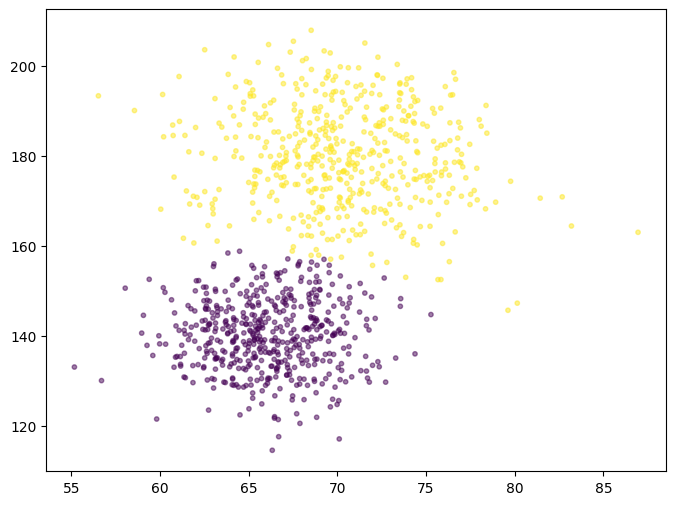

In [107]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y_hat,alpha=0.5,s=10)

In [108]:
def CoinFlip(y):

  y_hat=np.zeros(len(y))

  for i in range(len(y)):

    flip = np.random.randn(1)

    if flip >0:

      y_hat[i]=1

  return y_hat

 

In [109]:
accuracy(y,CoinFlip(y))

np.float64(0.488)

In [110]:
df = pd.read_csv('xor.csv')
df

,x1,x2,y
0,1.907567,0.325865,0
1,2.270544,2.258817,0
2,2.323086,1.466601,0
3,0.752419,2.684305,0
4,2.837229,2.238149,0
...,...,...,...
3995,2.274223,-2.579655,1
3996,1.541694,-1.140535,1
3997,3.059691,-2.873532,1
3998,3.525607,-2.331070,1


In [111]:
X = df.to_numpy()

In [112]:
y = X[:,2]

In [113]:
X = X[:,:2]

In [ ]:
xor = NaiveGaussNB()

In [115]:
print(np.unique(y))


[0. 1.]


In [116]:
xor.fit(X,y)

In [117]:
y_hat = xor.predict(X)


In [118]:
accuracy(y,y_hat)

np.float64(0.51275)

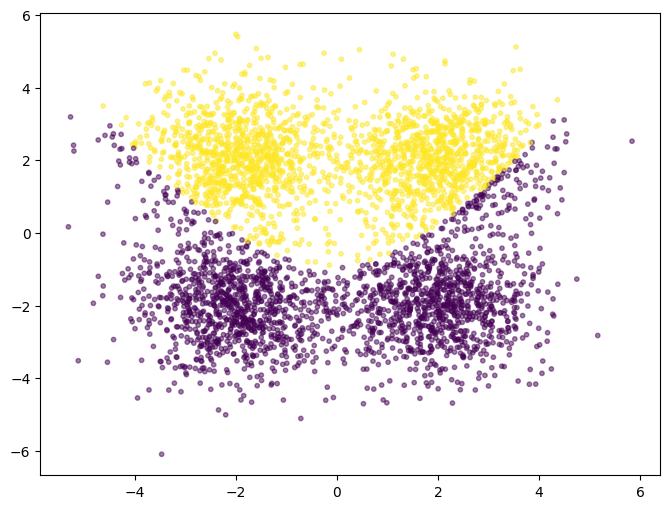

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y_hat,alpha=0.5,s=10)

In [120]:
class gaussBayes():
    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = sorted(set(y.astype(int)))  # ✅ FIX: use self.K (not self.k)

        for k in self.K:
            X_k = X[y == k, :]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)

            # ✅ Compute full covariance matrix (with smoothing)
            cov_k = (1 / (N_k - 1)) * np.matmul((X_k - mu_k).T, (X_k - mu_k)) + epsilon * np.identity(D)

            self.likelihoods[k] = {"mean": mu_k, "cov": cov_k}
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))

        for i, k in enumerate(self.K):  # ✅ use an index i to map classes to columns
            l = self.likelihoods[k]
            prior = np.log(self.priors[k])
            P_hat[:, i] = mvn.logpdf(X, l['mean'], l['cov']) + prior

        return np.array([self.K[i] for i in np.argmax(P_hat, axis=1)]) 

In [121]:
data2 = pd.read_csv('xor.csv')

In [122]:
X2 = data2.to_numpy()

In [123]:
y2 = X2[:,-1]
X2 = X2[:,:-1]

In [124]:
X2.shape

(4000, 2)

In [125]:
gaussNB = gaussBayes()

In [126]:
gaussNB.fit(X2,y2)

In [127]:
y_hat = gaussNB.predict(X2)

In [128]:
accuracy(y2, y_hat)

np.float64(0.95825)

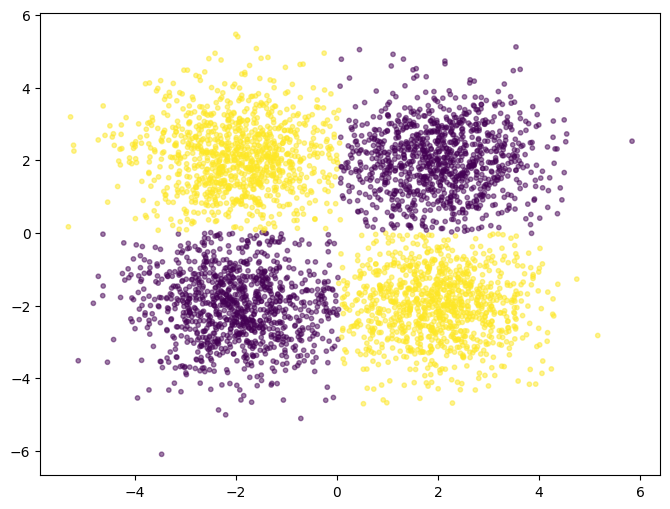

In [129]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y_hat,alpha=0.5,s=10)

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

In [131]:
mnist_train = pd.read_csv('MNIST_train.csv')

In [132]:
mnist_test = pd.read_csv('MNIST_test.csv')

In [133]:
mnist_train 

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
ALL = mnist_train.to_numpy()

In [135]:
ALL_test = mnist_test.to_numpy()
y_test = ALL_test[:,2]
X_test = ALL_test[:,3:]

In [136]:
X

array([[ 1.90756726,  0.32586513],
       [ 2.27054368,  2.25881652],
       [ 2.32308573,  1.46660143],
       ...,
       [ 3.0596909 , -2.87353245],
       [ 3.52560718, -2.33106954],
       [ 1.72005898, -1.13464011]], shape=(4000, 2))

In [137]:
y = ALL[:,2]

In [138]:
y

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,))

In [139]:
K = set(y)
K

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

In [140]:
X=ALL[:,3:]
X.shape

(60000, 784)

In [141]:
def show_me(X):
    plt.imshow(X.reshape(28,28))

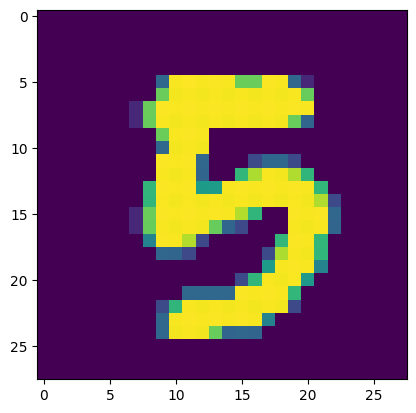

In [142]:
show_me(X[244])

In [143]:
def show_me_all_mean(X,y,k):
    show_me(sum(X[y==k, :]) / len(X[y==k, :]))


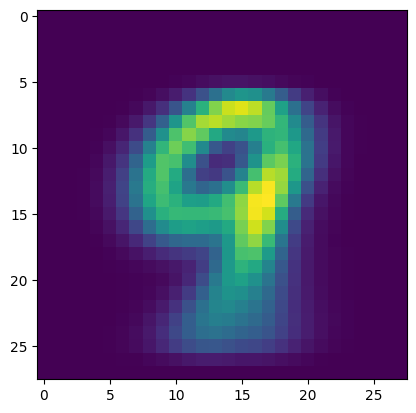

In [144]:
show_me_all_mean(X,y,9)

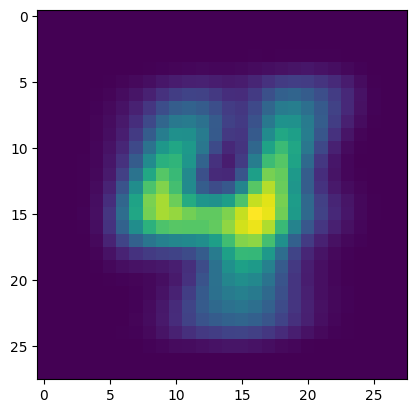

In [145]:
show_me_all_mean(X,y,4)

In [146]:
class NaiveGaussNB():
    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = sorted(set(y.astype(int)))
        self.class2index = {k: i for i, k in enumerate(self.K)}
        for k in self.K:
            X_k = X[y == k]
            self.likelihoods[k] = {
                "mean": X_k.mean(axis=0),
                "cov": np.diag(X_k.var(axis=0) + epsilon)
            }
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        for k, l in self.likelihoods.items():
            idx = self.class2index[k]
            P_hat[:, idx] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return np.array([self.K[i] for i in P_hat.argmax(axis=1)])  # convert index back to class label

  
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [147]:
gnb = NaiveGaussNB()

In [148]:
gnb.fit(X,y)

In [149]:
y_hat_train = gnb.predict(X)

In [150]:
y_hat_test = gnb.predict(X_test)

In [151]:
accuracy(y_hat_test,y_test)

np.float64(0.5878)

In [152]:
accuracy(y_hat_test,y_test)

np.float64(0.5878)

In [153]:
accuracy(y_hat_test, y_test)


np.float64(0.5878)

In [154]:
def confusionMatrix(y,y_hat):
    plt.figure(figsize=(10,7))
    y_actu = pd.Series(y, name='Actual')
    y_pred = pd.Series(y_hat, name='Predicted')
    cm = pd.crosstab(y_actu, y_pred)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

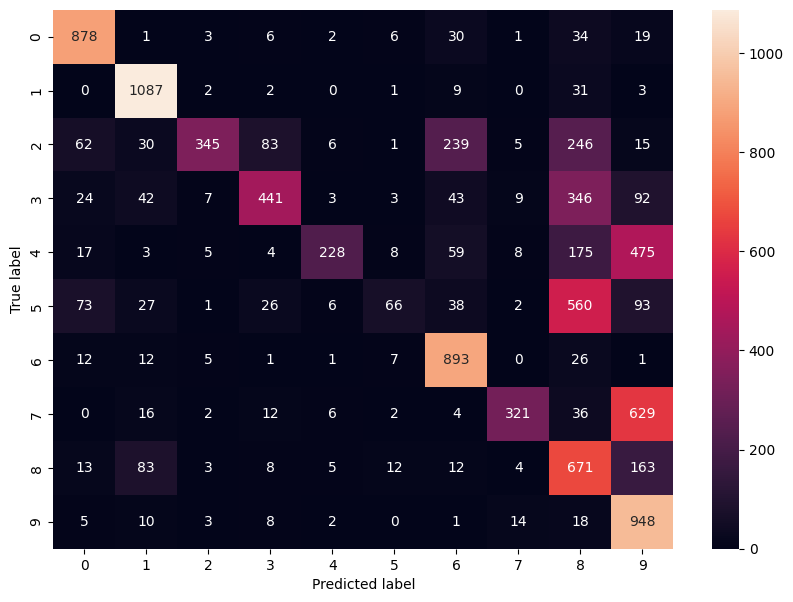

In [155]:
corr_mat(y_test,y_hat_test)

In [156]:
X_scaled = X/255

In [157]:
X_test_scaled = X_test/255

In [158]:
gnb_scaled = GaussNB()

In [159]:
gnb_scaled.fit(X_scaled,y)

In [ ]:
y_hat_test_scaled = gnb_scaled.predict(X_test_scaled)

In [ ]:
accuracy(y_test,y_hat_test_scaled)

np.float64(0.7746)

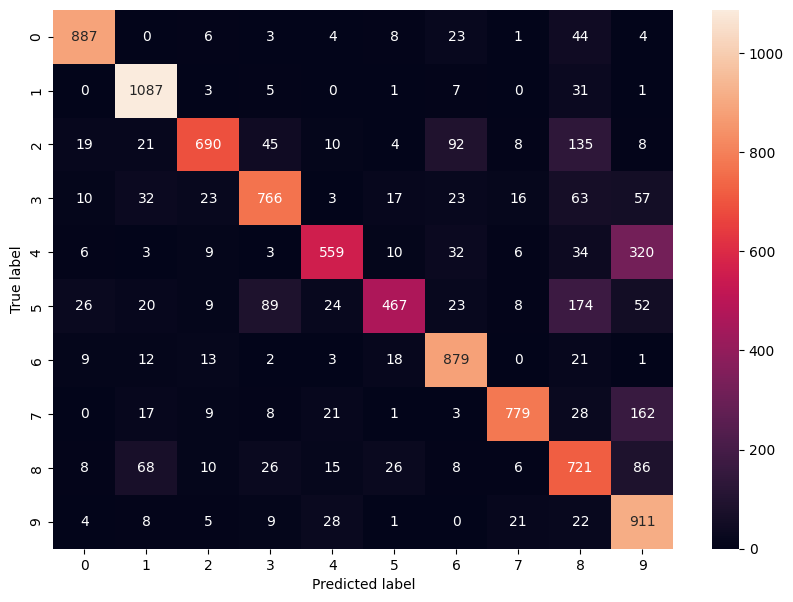

In [ ]:
confusionMatrix(y_test,y_hat_test_scaled)

In [ ]:
class gaussBayes():
    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = sorted(set(y.astype(int)))  

        for k in self.K:
            X_k = X[y == k, :]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)

            cov_k = (1 / (N_k - 1)) * np.matmul((X_k - mu_k).T, (X_k - mu_k)) + epsilon * np.identity(D)

            self.likelihoods[k] = {"mean": mu_k, "cov": cov_k}
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))

        for i, k in enumerate(self.K):  
            l = self.likelihoods[k]
            prior = np.log(self.priors[k])
            P_hat[:, i] = mvn.logpdf(X, l['mean'], l['cov']) + prior

        return np.array([self.K[i] for i in np.argmax(P_hat, axis=1)]) 
  
def accuracy(y, y_hat):
    return np.mean(y == y_hat)



In [ ]:
gaussNB = gaussBayes()

In [ ]:
gaussNB.fit(X_scaled,y, 3.5e-2)

In [ ]:
y_gauss_test = gaussNB.predict(X_test_scaled)

In [ ]:
accuracy(y_gauss_test,y_test)

np.float64(0.9564)

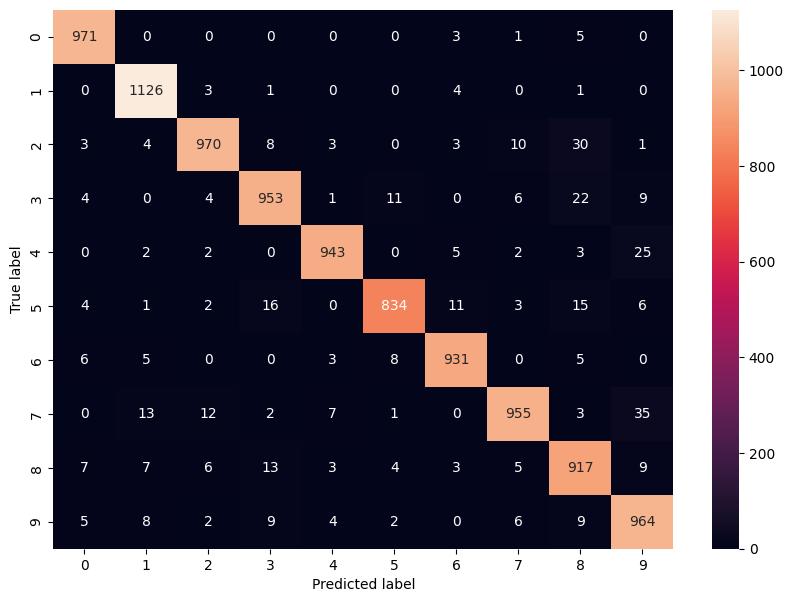

In [ ]:
corr_mat(y_test,y_gauss_test)